In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
np.seed(42)

In [3]:
tfms = get_transforms(flip_vert=True, max_warp=0, max_zoom=1.05, max_lighting=0.1)

In [4]:
path = Path('data/kaggle/planet')

In [5]:
src = (ImageList.from_csv(path, 'train_v2.csv', folder= 'train-jpg', suffix='.jpg').split_by_rand_pct(0.2). label_from_df(label_delim=' '))

In [6]:
data = (src.transform(tfms, size=128).databunch().normalize(imagenet_stats))

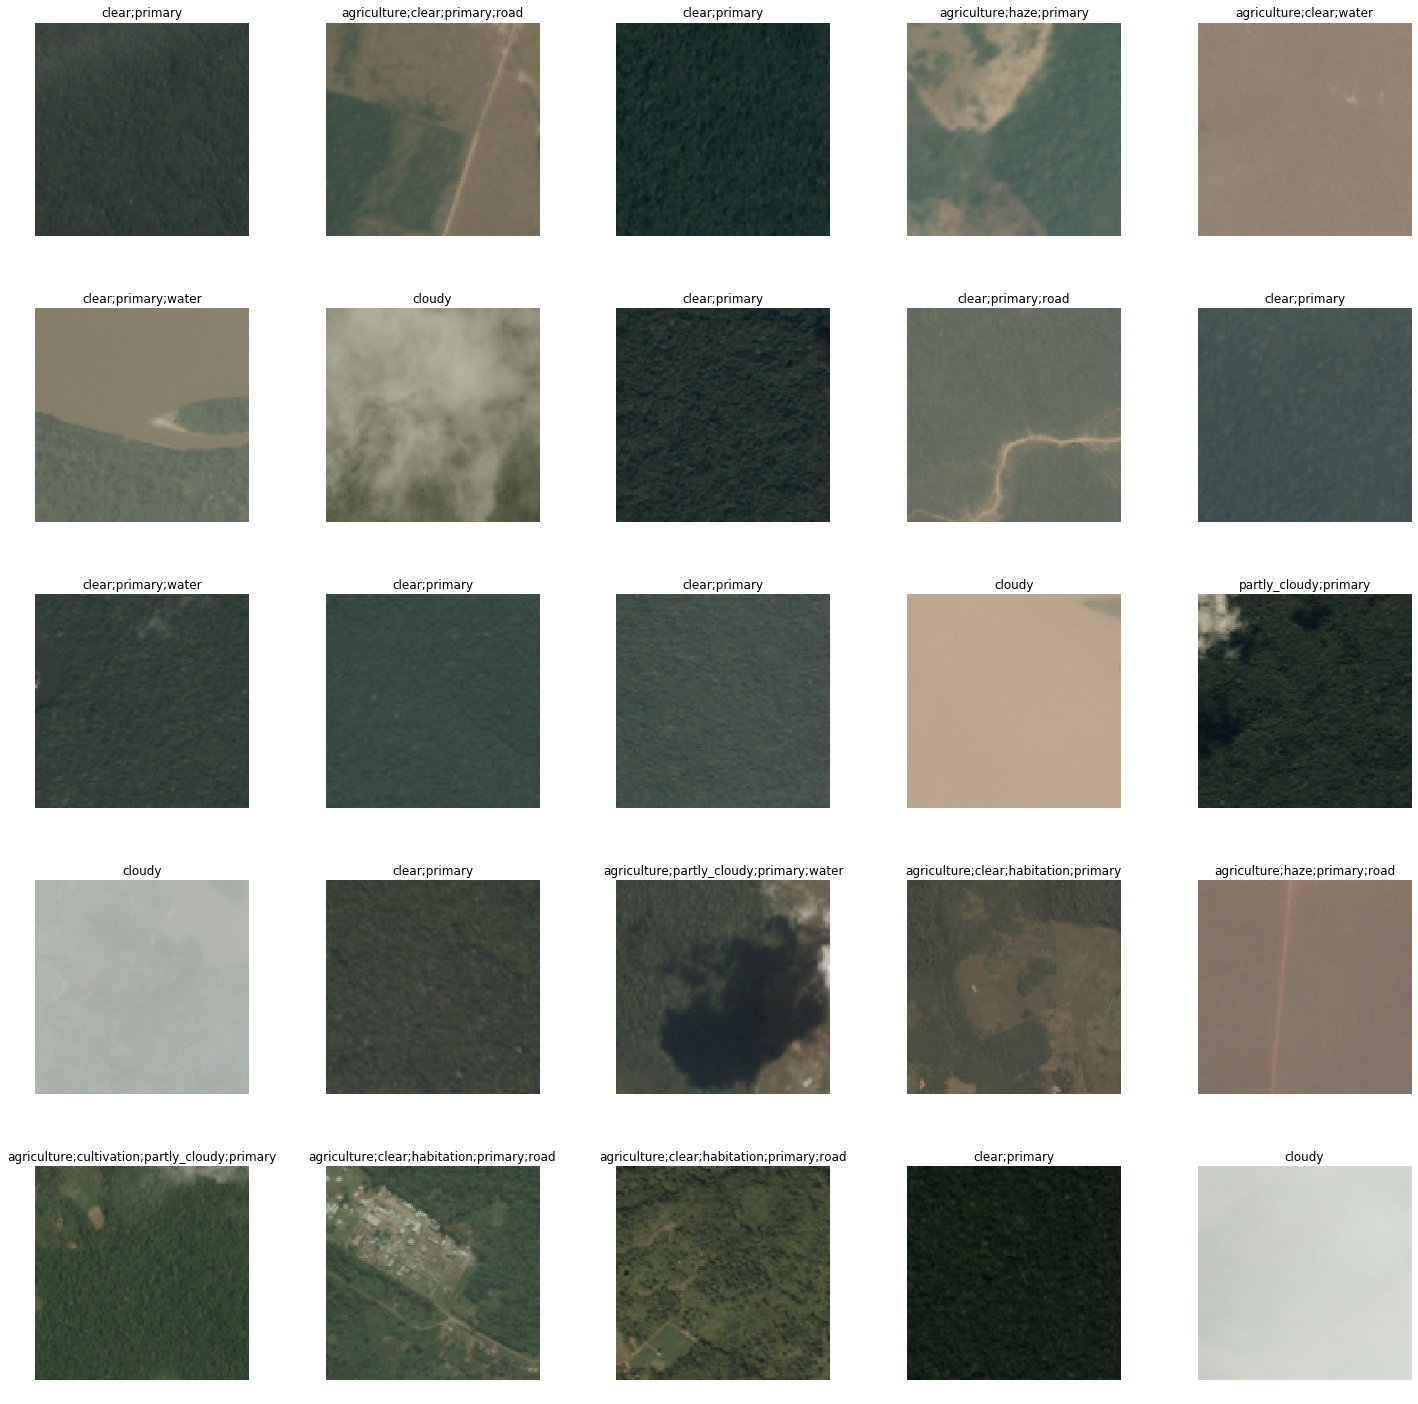

In [10]:
data.show_batch()

In [7]:
arch = models.resnet50

In [8]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [9]:
#fbeta() the beta in this determines the f1 or f2_score

In [10]:
learn = cnn_learner(data, arch, metrics = [acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


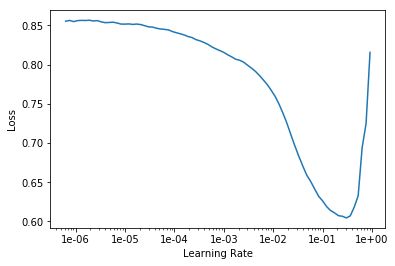

In [16]:
learn.lr_find()
learn.recorder.plot()

In [20]:
lr = 1e-2

In [19]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.123450,0.106511,0.949642,0.906082,03:58
1,0.113466,0.101891,0.950245,0.910472,03:55
2,0.102054,0.092299,0.957207,0.920585,03:51
3,0.096000,0.086218,0.956800,0.926256,03:53
4,0.094884,0.085384,0.957715,0.925928,03:56


In [20]:
learn.save('resnet-50-1')

In [21]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


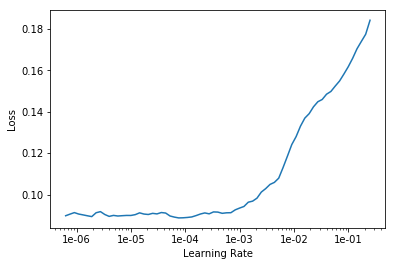

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099129,0.088876,0.952149,0.920983,04:34
1,0.098307,0.090215,0.953864,0.921975,04:34
2,0.091022,0.084706,0.956625,0.926825,04:37
3,0.086510,0.081536,0.957904,0.927692,04:38
4,0.082201,0.080292,0.957388,0.929633,04:36


In [24]:
learn.save('resnet-50-2')

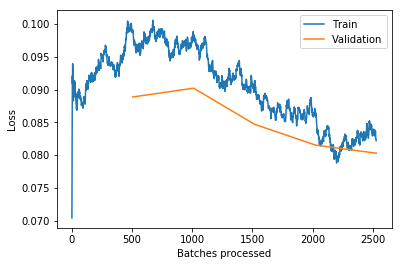

In [25]:
learn.recorder.plot_losses()

In [26]:
learn.export()

In [28]:
test = (ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional')))
len(test)

61191

In [29]:
learn = load_learner(path, test=test)

In [30]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [31]:
preds_tta, _ = learn.TTA(ds_type=DatasetType.Test)

In [33]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p> thresh]) for pred in preds]

In [35]:
labelled_preds_tta = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p> thresh]) for pred in preds_tta]

In [36]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [38]:
labelled_preds_tta[:5]

['clear primary',
 'clear primary',
 'clear partly_cloudy primary',
 'agriculture clear primary road water',
 'agriculture clear primary road water']

In [40]:
sub = pd.DataFrame({'image_name': fnames, 'tags':labelled_preds}, columns = ['image_name', 'tags'])
sub.to_csv('sub.csv', index=False)

In [41]:
sub = pd.DataFrame({'image_name': fnames, 'tags':labelled_preds_tta}, columns = ['image_name', 'tags'])
sub.to_csv('sub2.csv', index=False)

In [42]:
data = (src.transform(tfms, size=256).databunch().normalize(imagenet_stats))

In [21]:
learn.load('resnet-50-2')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: data\kaggle\planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
agriculture;clear;primary;road,agriculture;clear;cultivation;habitation;primary;road,haze;primary,clear;primary,cloudy
Path: data\kaggle\planet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    

In [22]:
learn.data = data 
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


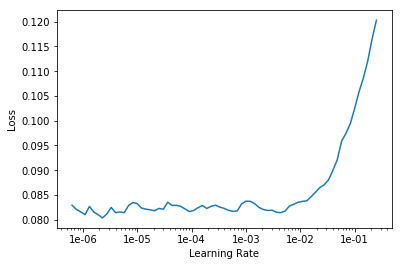

In [15]:
learn.lr_find()
learn.recorder.plot()

In [23]:
lr = lr/2

In [24]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.084373,0.076365,0.960658,0.931635,03:50
1,0.086141,0.078854,0.961981,0.929789,03:49
2,0.084206,0.076665,0.958653,0.932726,03:52
3,0.082128,0.075568,0.960469,0.933850,03:52
4,0.078045,0.074842,0.960680,0.934665,03:51


In [25]:
learn.unfreeze()

In [26]:
learn.save('resnet50-3')

In [27]:
learn.fit_one_cycle(5, slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.082565,0.078204,0.958362,0.932120,04:33
1,0.085833,0.080758,0.958260,0.928166,04:32
2,0.081751,0.079262,0.959685,0.930208,04:31
3,0.078887,0.077227,0.959169,0.931930,04:35
4,0.075085,0.077247,0.959917,0.931647,04:33


In [28]:
learn.save('resnet50-4')

In [42]:
learn.load('resnet50-4')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: MultiCategoryList

Path: data\kaggle\planet;

Valid: LabelList (0 items)
x: ImageList

y: MultiCategoryList

Path: data\kaggle\planet;

Test: LabelList (61191 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: data\kaggle\planet, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [43]:
test = (ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional')))
len(test)

61191

In [44]:
learn.export()

In [45]:
learn = load_learner(path, test=test)

In [46]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p> thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [47]:
sub = pd.DataFrame({'image_name': fnames, 'tags':labelled_preds}, columns = ['image_name', 'tags'])
sub.to_csv('sub.csv', index=False)

In [49]:
len(fnames), len(labelled_preds)

(61191, 61191)